In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

In [4]:
repay = pd.read_csv("/Users/arjun/Documents/Data course/Python Case Study 2 - Credit Card Case Study/Repayment.csv")
spend = pd.read_csv("/Users/arjun/Documents/Data course/Python Case Study 2 - Credit Card Case Study/spend.csv")
cust = pd.read_csv("/Users/arjun/Documents/Data course/Python Case Study 2 - Credit Card Case Study/Customer Acqusition.csv")

# Q1

In [15]:
cust[cust['Age']>=18].Age.mean() 

48.52127659574468

In [25]:
newages = []
for i in cust['Age']:
    if (i<18):
        newages.append(49)
    else:
        newages.append(i)
cust['Age'] = pd.Series(newages)

 All ages have been cleaned up

In [28]:
cust

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [30]:
spend_with_cust = pd.merge(spend, cust, how="left", left_on=["Customer"],  right_on=["Customer"])

In [31]:
spend_with_cust

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment
0,1,A1,12-Jan-04,JEWELLERY,485470.80,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A1,3-Jan-04,PETRO,410556.13,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
2,3,A1,15-Jan-04,CLOTHES,23740.46,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
3,4,A1,25-Jan-04,FOOD,484342.47,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
4,5,A1,17-Jan-05,CAMERA,369694.07,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73,67,54,CHENNAI,Gold,500000.0,C29,Normal Salary
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10,68,49,TRIVANDRUM,Silver,100000.0,C30,Self Employed
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44,69,33,CALCUTTA,Platimum,10000.0,C31,Self Employed
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94,70,49,BOMBAY,Platimum,10001.0,C32,Self Employed


In [32]:
new_spends = []
for i in range(0, len(spend_with_cust)) :
    if (spend_with_cust['Amount'] [i] > spend_with_cust['Limit'] [i]):
        new_spends.append(spend_with_cust['Limit'][i]/2)
    else:
        new_spends.append(spend_with_cust['Amount'] [i] )
spend_with_cust['Amount'] = pd.Series(new_spends)

In [46]:
repay[repay['SL No:'].isnull()]
repay = repay.head(-23)

In [48]:
repay_with_cust = pd.merge(repay, cust, how="left", left_on=["Customer"],  right_on=["Customer"])
repay_with_cust

,SL No:,Customer,Month,Amount,Unnamed: 4,No,Age,City,Product,Limit,Company,Segment
0,NaN,A1,12-Jan-04,495414.75,NaN,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2.0,A1,3-Jan-04,245899.02,NaN,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
2,3.0,A1,15-Jan-04,259490.06,NaN,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
3,4.0,A1,25-Jan-04,437555.12,NaN,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
4,5.0,A1,17-Jan-05,165972.88,NaN,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496.0,A67,9-May-05,55638.77,NaN,67,54,CHENNAI,Gold,500000.0,C29,Normal Salary
1496,1497.0,A68,10-May-06,319836.49,NaN,68,49,TRIVANDRUM,Silver,100000.0,C30,Self Employed
1497,1498.0,A69,11-Jul-06,247628.45,NaN,69,33,CALCUTTA,Platimum,10000.0,C31,Self Employed
1498,1499.0,A70,12-Aug-05,454016.51,NaN,70,49,BOMBAY,Platimum,10001.0,C32,Self Employed


In [49]:
new_repay = []
for i in range(0, len(repay_with_cust)) :
    if (repay_with_cust['Amount'] [i] > repay_with_cust['Limit'] [i]):
        new_repay.append(repay_with_cust['Limit'][i])
    else:
        new_repay.append(repay_with_cust['Amount'] [i] )
repay_with_cust['Amount'] = pd.Series(new_repay)

# Q2

## 2a

In [51]:
cust['Customer'].nunique()

100

There are 100 unique customers

## 2b

In [54]:
spend_with_cust['Type'].nunique()

15

There are 15 unique categories of products

## 2c

In [60]:
typecasteddate = pd.to_datetime(spend_with_cust['Month'], format= "%d-%b-%y")
spend_with_cust['Date'] = typecasteddate
spend_with_cust['Month Number'] = spend_with_cust['Date'].dt.month
spend_with_cust

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment,Date,Month Number
0,1,A1,12-Jan-04,JEWELLERY,485470.80,1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,1
1,2,A1,3-Jan-04,PETRO,410556.13,1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,1
2,3,A1,15-Jan-04,CLOTHES,23740.46,1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,1
3,4,A1,25-Jan-04,FOOD,484342.47,1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,1
4,5,A1,17-Jan-05,CAMERA,369694.07,1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73,67,54,CHENNAI,Gold,500000.0,C29,Normal Salary,2006-02-04,2
1496,1497,A68,25-Mar-06,BUS TICKET,50000.00,68,49,TRIVANDRUM,Silver,100000.0,C30,Self Employed,2006-03-25,3
1497,1498,A69,31-Mar-06,BUS TICKET,5000.00,69,33,CALCUTTA,Platimum,10000.0,C31,Self Employed,2006-03-31,3
1498,1499,A70,23-Mar-06,BUS TICKET,5000.50,70,49,BOMBAY,Platimum,10001.0,C32,Self Employed,2006-03-23,3


In [64]:
spend_with_cust.groupby('Month Number').agg(Average_monthly_spend = ("Amount", 'mean'))

,Average_monthly_spend
Month Number,
1,147770.183266
2,151261.565126
3,131840.761861
4,135035.927333
5,151623.982190
6,182037.731429
7,166326.817857
8,165759.596190
9,141131.704524


## 2d

In [65]:
typecasteddate = pd.to_datetime(repay_with_cust['Month'], format= "%d-%b-%y")
repay_with_cust['Date'] = typecasteddate
repay_with_cust['Month Number'] = repay_with_cust['Date'].dt.month
repay_with_cust.groupby('Month Number').agg(Average_monthly_repayment = ("Amount", 'mean'))

,Average_monthly_repayment
Month Number,
1,163445.534263
2,158873.098158
3,156430.854155
4,167676.814933
5,186097.903985
6,114146.549375
7,165203.918980
8,152817.425510
9,129345.768500


## 2e

In [68]:
total_spend = spend_with_cust.groupby('Month Number').agg(Total_monthly_spend = ("Amount", 'sum'))

In [69]:
total_repay = repay_with_cust.groupby('Month Number').agg(Total_monthly_repayment = ("Amount", 'sum'))

In [70]:
monthly_merge = pd.merge(total_spend, total_repay, how="left", left_on=["Month Number"],  right_on=["Month Number"])

In [74]:
monthly_merge['Monthly_profit'] = monthly_merge["Total_monthly_repayment"] - monthly_merge["Total_monthly_spend"]
monthly_merge['Monthly_interest'] = monthly_merge['Monthly_profit'] * 2.9/100

,Total_monthly_spend,Total_monthly_repayment,Monthly_profit,Monthly_interest
Month Number,,,,
1,51571793.96,52139125.43,567331.47,16452.61263
2,36000252.50,36223066.38,222813.88,6461.60252
3,30455215.99,34258357.06,3803141.07,110291.09103
4,20255389.10,25151522.24,4896133.14,141987.86106
5,31841036.26,49502042.46,17661006.20,512169.17980
6,10194112.96,5479034.37,-4715078.59,-136737.27911
7,6985726.35,8094992.03,1109265.68,32168.70472
8,6961903.04,7488053.85,526150.81,15258.37349
9,5927531.59,5173830.74,-753700.85,-21857.32465


In [76]:
monthly_merge['Monthly_interest']  = np.where(monthly_merge["Monthly_interest"] < 0, 0, monthly_merge["Monthly_interest"])

In [77]:
monthly_merge

,Total_monthly_spend,Total_monthly_repayment,Monthly_profit,Monthly_interest
Month Number,,,,
1,51571793.96,52139125.43,567331.47,16452.61263
2,36000252.50,36223066.38,222813.88,6461.60252
3,30455215.99,34258357.06,3803141.07,110291.09103
4,20255389.10,25151522.24,4896133.14,141987.86106
5,31841036.26,49502042.46,17661006.20,512169.17980
6,10194112.96,5479034.37,-4715078.59,0.00000
7,6985726.35,8094992.03,1109265.68,32168.70472
8,6961903.04,7488053.85,526150.81,15258.37349
9,5927531.59,5173830.74,-753700.85,0.00000


## 2f

In [82]:
spend_with_cust.groupby('Type').agg(Total_spend = ("Amount", 'sum')).sort_values(by='Total_spend',ascending=0)

,Total_spend
Type,
PETRO,28597384.98
CAMERA,27690738.44
FOOD,20519243.60
AIR TICKET,20155847.12
TRAIN TICKET,19995825.72
SHOPPING,17106660.97
BUS TICKET,16279935.35
MOVIE TICKET,13001899.29
CLOTHES,12302511.36


 The top 5 are petrol, camera, food, air tickets, train tickets

## 2g

In [83]:
spend_with_cust.groupby('City').agg(Total_spend = ("Amount", 'sum')).sort_values(by='Total_spend',ascending=0)

,Total_spend
City,
COCHIN,45963513.50
CALCUTTA,41108132.30
BANGALORE,40461647.02
BOMBAY,28603127.38
CHENNAI,22128635.65
TRIVANDRUM,15337155.87
PATNA,15260586.97
DELHI,10918286.54


 The top 5 are Cochin, Calcutta, Bangalore, Bombay and Chennai  

# 2h

In [92]:
spend_with_cust['Age_group']=pd.cut(x=spend_with_cust['Age'], bins=[0,18,25,40,55,65,100])

In [93]:
spend_with_cust

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment,Date,Month Number,Age_group
0,1,A1,12-Jan-04,JEWELLERY,485470.80,1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,1,"(65, 100]"
1,2,A1,3-Jan-04,PETRO,410556.13,1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,1,"(65, 100]"
2,3,A1,15-Jan-04,CLOTHES,23740.46,1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,1,"(65, 100]"
3,4,A1,25-Jan-04,FOOD,484342.47,1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,1,"(65, 100]"
4,5,A1,17-Jan-05,CAMERA,369694.07,1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,1,"(65, 100]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73,67,54,CHENNAI,Gold,500000.0,C29,Normal Salary,2006-02-04,2,"(40, 55]"
1496,1497,A68,25-Mar-06,BUS TICKET,50000.00,68,49,TRIVANDRUM,Silver,100000.0,C30,Self Employed,2006-03-25,3,"(40, 55]"
1497,1498,A69,31-Mar-06,BUS TICKET,5000.00,69,33,CALCUTTA,Platimum,10000.0,C31,Self Employed,2006-03-31,3,"(25, 40]"
1498,1499,A70,23-Mar-06,BUS TICKET,5000.50,70,49,BOMBAY,Platimum,10001.0,C32,Self Employed,2006-03-23,3,"(40, 55]"


In [94]:
spend_with_cust.groupby('Age_group').agg(Total_spend = ("Amount", 'sum')).sort_values(by='Total_spend',ascending=0)

,Total_spend
Age_group,
"(40, 55]",78944914.10
"(25, 40]",65589014.49
"(65, 100]",37506828.20
"(18, 25]",24430197.30
"(55, 65]",13310131.14
"(0, 18]",0.00


The age group of 40-55 is spending most.

# 2i

In [97]:
repay_with_cust.groupby('Customer').agg(Total_repay = ("Amount", 'sum')).sort_values(by='Total_repay',ascending=0).head(10)

,Total_repay
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


These are the top 10 customers based on repayment

# Q3 : Visualisation

In [168]:
spend_with_cust['Year'] = spend_with_cust['Date'].dt.year
data_2004 = spend_with_cust[spend_with_cust['Year'] == 2004]
data_2005 = spend_with_cust[spend_with_cust['Year'] == 2005]
data_2006 = spend_with_cust[spend_with_cust['Year'] == 2006]


graphdata = data_2004.groupby(['Product','City']).agg(Total_spend = ("Amount", 'sum'))
graphdata = graphdata.reset_index()
 

graphdata2 = data_2005.groupby(['Product','City']).agg(Total_spend = ("Amount", 'sum'))
graphdata2 = graphdata2.reset_index()
 

graphdata3 = data_2006.groupby(['Product','City']).agg(Total_spend = ("Amount", 'sum'))
graphdata3 = graphdata3.reset_index()
 

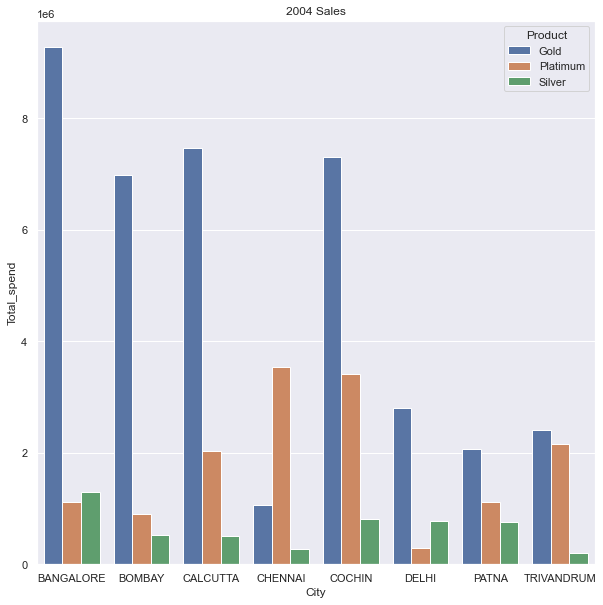

In [181]:
sns.barplot(x = "City", y = "Total_spend", hue = "Product", data = graphdata).set(title='2004 Sales')
sns.set(rc = {'figure.figsize':(10,10)})

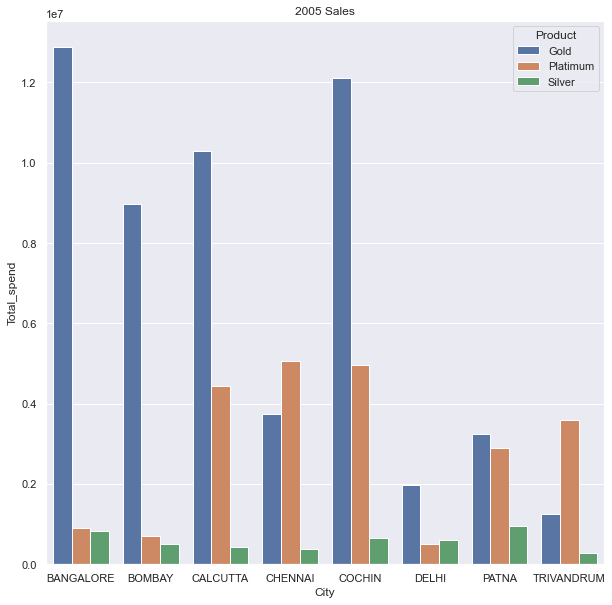

In [180]:
sns.barplot(x = "City", y = "Total_spend", hue = "Product", data = graphdata2).set(title='2005 Sales')
sns.set(rc = {'figure.figsize':(10,10)})

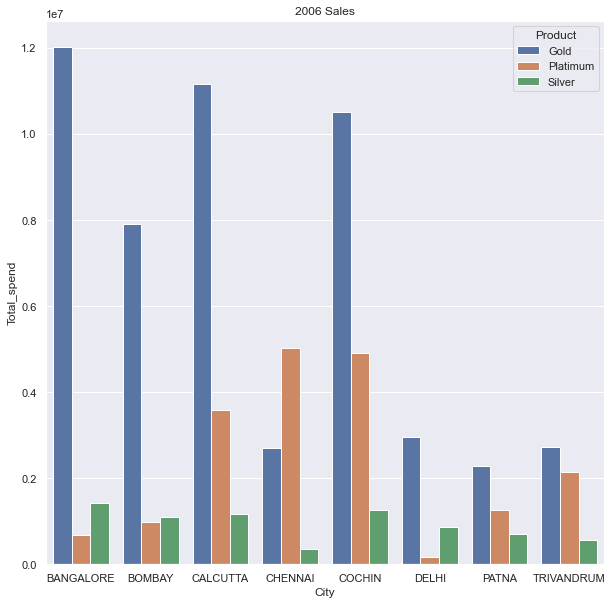

In [179]:
sns.barplot(x = "City", y = "Total_spend", hue = "Product", data = graphdata3).set(title='2006 Sales')
sns.set(rc = {'figure.figsize':(10,10)})


# Q4

In [184]:
q4a = spend_with_cust.groupby(['Month Number', 'City']).agg(Total_spend= ("Amount", 'sum'))
q4a = q4a.reset_index()

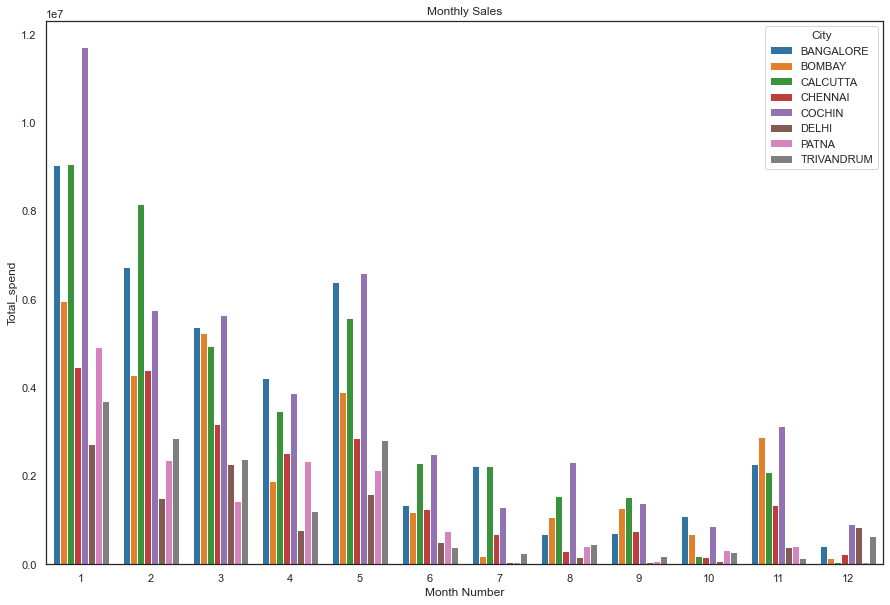

In [208]:
sns.barplot(x = "Month Number", y = "Total_spend", hue = "City", data = q4a, palette =sns.color_palette("tab10") ).set(title='Monthly Sales')
sns.set(rc = {'figure.figsize':(15,10)})
sns.set_theme(style='white')

In [212]:
q4b = spend_with_cust[spend_with_cust['Type']=='AIR TICKET']
q4b = q4b.groupby(['Year']).agg(Total_spend= ("Amount", 'sum'))
q4b

,Total_spend
Year,
2004,4357225.35
2005,10550152.21
2006,5248469.56


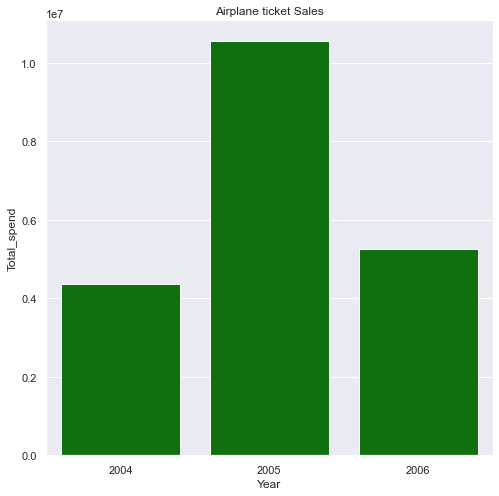

In [217]:
sns.barplot(x = q4b.index,
            y = 'Total_spend',
            data = q4b,
            color = "green"
           ).set(title='Airplane ticket Sales')
sns.set(rc = {'figure.figsize':(8,8)})

In [223]:
q4c = spend_with_cust.groupby(['Product', 'Month Number']).agg(Total_spend= ("Amount", 'sum'))
q4c.reset_index(inplace = True)

In [225]:
df4c = q4c.pivot(index="Month Number",columns="Product",values="Total_spend")
df4c

Product,Gold,Platimum,Silver
Month Number,,,
1,32413831.83,14951578.51,4206383.62
2,24779179.55,9134054.58,2087018.37
3,19256972.48,7288837.68,3909405.83
4,13170572.59,5182493.86,1902322.65
5,21548169.76,8151926.49,2140940.01
6,6538862.64,2965712.71,689537.61
7,5167416.37,1288156.26,530153.72
8,4954030.42,1714762.80,293109.82
9,3816887.62,1667840.84,442803.13


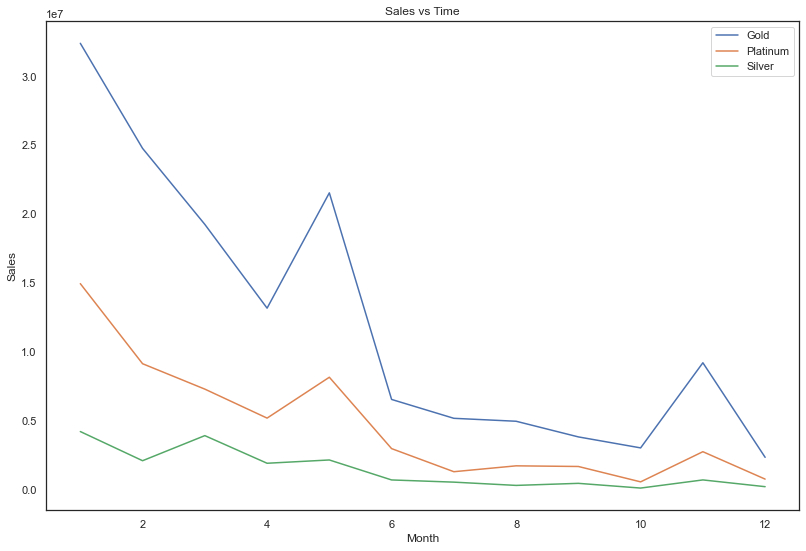

In [258]:
go =df4c['Gold']
pl =df4c['Platimum']
si =df4c['Silver']
  
mylist = [go, pl, si]

for i in mylist:
     plt.plot(df4c.index, i)

plt.title('Sales vs Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend( ["Gold","Platinum","Silver" ], loc = 'upper right')
plt.rcParams["figure.figsize"] = (13.5,9)
sns.set_theme(style='white')

Question: look for any seasonality that exists in terms of spend?
Response:  We can observe that there is seasonality as all product sales spike in the months of May and November particularly. They decrease till April and start rising in October.

# Q5

In [264]:
repay_with_cust['Year'] = repay_with_cust['Date'].dt.year

In [326]:
def find_top_10(product:str, period:str):
    if (product == 'Platinum'):
        product = 'Platimum' # to account for typo in original dataset
    
    if (period == 'yearly'):
        filtered_df = repay_with_cust [repay_with_cust['Product'] == product]
        groupings = filtered_df.groupby(['Year', 'Customer']).agg(Total_repay = ("Amount", 'sum')).reset_index()
        return groupings.groupby(['Year'])['Total_repay'].nlargest(10)

    
    elif (period == 'monthly'):
        filtered_df = repay_with_cust [repay_with_cust['Product'] == product]
        groupings = filtered_df.groupby(['Month Number', 'Customer']).agg(Total_repay = ("Amount", 'sum')).reset_index()
        return groupings.groupby(['Month Number'])['Total_repay'].nlargest(10)
        
    else: 
        print ("Enter valid input: either yearly or monthly")
    

## Use case of function

In [331]:
output = find_top_10("Gold", "yearly")
output

Year    
2004  16    3045914.71
      20    2890721.81
      5     2770261.30
      19    2557947.39
      21    2518154.95
      0     2359797.84
      3     2339080.90
      4     2337012.77
      18    2149383.50
      17    1906497.47
2005  51    4276860.55
      48    4165317.77
      49    4042447.57
      47    4006956.60
      34    3757673.00
      50    3742856.10
      46    3125758.43
      33    2877588.30
      41    2827009.82
      40    2782591.71
2006  76    3744127.41
      59    3477314.89
      67    3434298.00
      66    3376614.65
      64    3330421.30
      75    3242712.83
      63    3127783.14
      58    3118090.96
      61    2783141.43
      60    2681025.72
Name: Total_repay, dtype: float64